<a href="https://colab.research.google.com/github/PaoPla/Extraccion-de-caracteristicas/blob/main/Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [51]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (1).xlsx


{'microretailer_mit_lift_lab.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [52]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx', index_col= 0) 

In [53]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, dff2998e-af74-4de6-8efd-488aca24e67b to bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c
Columns: 105 entries, _title to 235_email
dtypes: float64(23), int64(2), object(80)
memory usage: 141.6+ KB


In [54]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
_record_id,,,,,,,,,,,,,,,,,,,,,
dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),yes,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),no,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


##**VALORES NULOS**

In [55]:
Micro_Retailer.isnull().sum()

_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
_latitude                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 105, dtype: int64

In [67]:
cuan = Micro_Retailer.select_dtypes(include=[np.float, np.int])
cuali = Micro_Retailer.select_dtypes(include=[np.object])

<ipython-input-67-f34a598d76e4>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuan = Micro_Retailer.select_dtypes(include=[np.float, np.int])
<ipython-input-67-f34a598d76e4>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

In [69]:
cuan.isnull().sum()

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     3
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                         60
4_number_permanent_employees_last_year                76
103_number_own_fridges                               144
145_number_direct_competitors                         68
24_burnout                                           133
271_card_fee                                         171
272_card_days_receive_money                          127
273_platform_extra_charge                            171
274_platform_fee                                     171
275_platform_days_receive_money                      171
276_expected_days_informal_credit                    147
36_credit_default_rate                               157
315_frequency_topups           

In [70]:
cuali.isnull().sum()

_title                                              0
_server_updated_at                                  0
_updated_by                                         0
_geometry                                           0
228_store_name                                      0
                                                 ... 
267_technology_investment_customer_preferences    101
234_willingness_participate_workshop               73
318_shopkeeper_name                               123
319_shopkeepers_last_name                         125
235_email                                         142
Length: 80, dtype: int64

In [71]:
cuan = cuan.fillna(0)
cuali = cuali.fillna('--')

In [72]:
cuan.isnull().sum().sum()

0

In [73]:
cuali.isnull().sum().sum()

0

##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

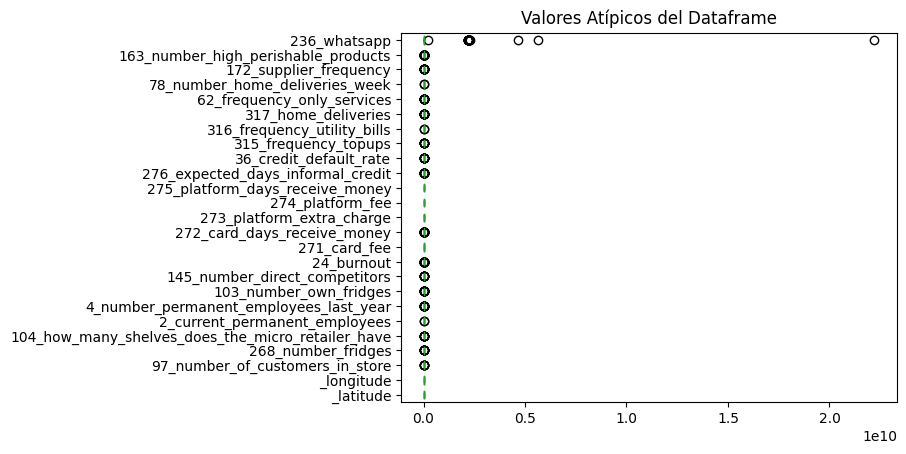

In [74]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuan.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [75]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuan

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            19.138774
_longitude                                          -98.075320
97_number_of_customers_in_store                       5.000000
268_number_fridges                                    5.000000
104_how_many_shelves_does_the_micro_retailer_have    16.000000
2_current_permanent_employees                         5.000000
4_number_permanent_employees_last_year                2.500000
103_number_own_fridges                                0.000000
145_number_direct_competitors                         8.750000
24_burnout                                            0.000000
271_card_fee                                          0.000000
272_card_days_receive_money                           0.000000
273_platform_extra_charge                             0.000000
274_platform_fee                                      0.000000
275_platform_days_receive_money                       0.000000
276_expected_days_informal_cr

In [76]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuan[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
_record_id,,,,,,,,,,,,,,,,,,,,,
dff2998e-af74-4de6-8efd-488aca24e67b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c596412f-4fc2-4983-acba-d9565859e42f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
5bb632b3-41b5-4fb6-a817-b564e8b45a48,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
6774a0f6-bab4-4a58-bf94-95ad0b7cb438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6cc637fa-3d54-48c7-9499-6de13d0a26aa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413f06e-15cc-4a6f-8e83-5224c6824b12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962bf5a6-1eff-4874-a627-9cd8e3ca27b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9ff658db-4dc5-48b6-aa0b-5c6668bb6720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#Obtenemos datos limpios del Dataframe
cuan= cuan[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuan

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
_record_id,,,,,,,,,,,,,,,,,,,,,
dff2998e-af74-4de6-8efd-488aca24e67b,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c596412f-4fc2-4983-acba-d9565859e42f,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
5bb632b3-41b5-4fb6-a817-b564e8b45a48,19.058655,-98.232300,0.0,0.0,NaN,2.0,2.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
6774a0f6-bab4-4a58-bf94-95ad0b7cb438,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6cc637fa-3d54-48c7-9499-6de13d0a26aa,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413f06e-15cc-4a6f-8e83-5224c6824b12,19.043115,-98.194066,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
962bf5a6-1eff-4874-a627-9cd8e3ca27b4,19.042794,-98.193802,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9ff658db-4dc5-48b6-aa0b-5c6668bb6720,19.042809,-98.193439,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#Corroboramos valores nulos del dataframe LIMPIO
cuan.isnull().sum()

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                         2
4_number_permanent_employees_last_year               18
103_number_own_fridges                               19
145_number_direct_competitors                         7
24_burnout                                           38
271_card_fee                                          0
272_card_days_receive_money                          34
273_platform_extra_charge                             0
274_platform_fee                                      0
275_platform_days_receive_money                       0
276_expected_days_informal_credit                    24
36_credit_default_rate                                9
315_frequency_topups                            

In [79]:
#Reemplazamos valores atípicos (nulos) del dataframe con 0
#Realizamos una copia del dataframe
cuan=cuan.fillna(0)
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuan.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
271_card_fee                                         0
272_card_days_receive_money                          0
273_platform_extra_charge                            0
274_platform_fee                                     0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_freque

In [80]:
Micro_Retailer=pd.merge(cuali,cuan , left_index=True, right_index=True, how='outer')
Micro_Retailer.head()

,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
_record_id,,,,,,,,,,,,,,,,,,,,,
dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
Micro_Retailer.isnull().sum().sum()

0

#**ANALISIS UNIVARIADO**

In [82]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

              _title  frequency  percentage  cumulative_perc
0   November 9, 2022         73    0.426901         0.426901
1  November 10, 2022         26    0.152047         0.578947
2   November 7, 2022         20    0.116959         0.695906
3   November 3, 2022         16    0.093567         0.789474
4  November 12, 2022         15    0.087719         0.877193
5   November 8, 2022         10    0.058480         0.935673
6   November 4, 2022          9    0.052632         0.988304
7  November 11, 2022          1    0.005848         0.994152
8   November 2, 2022          1    0.005848         1.000000

----------------------------------------------------------------

          _server_updated_at  frequency  percentage  cumulative_perc
0    2022-11-09 23:13:46 UTC          3    0.017544         0.017544
1    2022-11-11 22:11:34 UTC          3    0.017544         0.035088
2    2022-11-09 23:13:47 UTC          3    0.017544         0.052632
3    2022-11-12 22:15:09 UTC          3    0.01

##**214_customer_relationship_tools**

In [83]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,--,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [85]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]
Filtro1

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,--,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216


In [86]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('214_customer_relationship_tools')
Filtro1_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
--,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


Text(0, 0.5, 'Frecuencia')

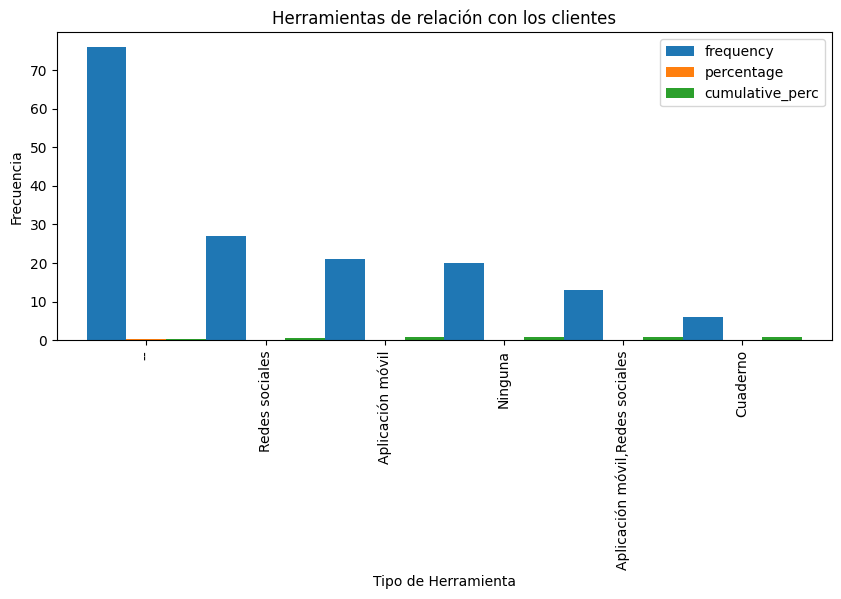

In [87]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**162_inventory_extra_space**

In [88]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(Micro_Retailer['162_inventory_extra_space'])
table2

,162_inventory_extra_space,frequency,percentage,cumulative_perc
0,--,82,0.479532,0.479532
1,0,29,0.169591,0.649123
2,20%,20,0.116959,0.766082
3,10%,17,0.099415,0.865497
4,30%,10,0.058480,0.923977
5,50% +,9,0.052632,0.976608
6,40%,3,0.017544,0.994152
7,2%,1,0.005848,1.000000


In [94]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>1]
Filtro2

,162_inventory_extra_space,frequency,percentage,cumulative_perc
0,--,82,0.479532,0.479532
1,0,29,0.169591,0.649123
2,20%,20,0.116959,0.766082
3,10%,17,0.099415,0.865497
4,30%,10,0.058480,0.923977
5,50% +,9,0.052632,0.976608
6,40%,3,0.017544,0.994152


In [95]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('162_inventory_extra_space')
Filtro2_index

,frequency,percentage,cumulative_perc
162_inventory_extra_space,,,
--,82,0.479532,0.479532
0,29,0.169591,0.649123
20%,20,0.116959,0.766082
10%,17,0.099415,0.865497
30%,10,0.058480,0.923977
50% +,9,0.052632,0.976608
40%,3,0.017544,0.994152


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

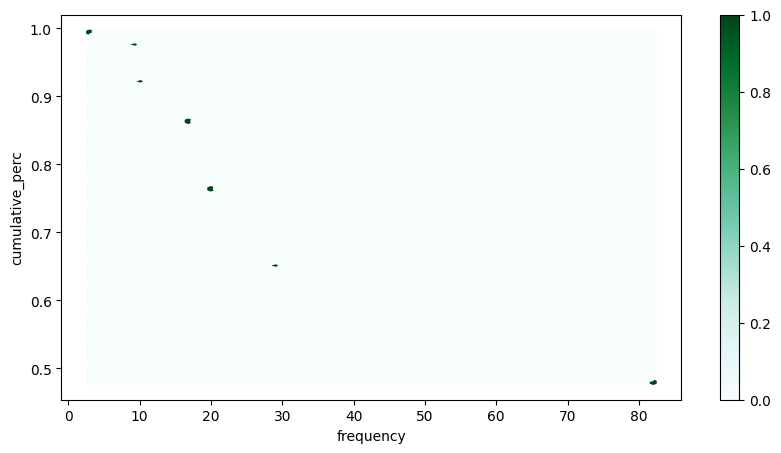

In [96]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro2_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

##**60_services**

In [97]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(Micro_Retailer['60_services'])
table3

,60_services,frequency,percentage,cumulative_perc
0,--,94,0.549708,0.549708
1,Ninguno,44,0.257310,0.807018
2,Entrega a domicilio,15,0.087719,0.894737
3,Recarga telefónica,7,0.040936,0.935673
4,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
5,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064
6,Toma de papa nicolau,1,0.005848,0.964912
7,Renta de local,1,0.005848,0.970760
8,venta,1,0.005848,0.976608
9,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.982456


In [98]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3['frequency']>1]
Filtro3

,60_services,frequency,percentage,cumulative_perc
0,--,94,0.549708,0.549708
1,Ninguno,44,0.257310,0.807018
2,Entrega a domicilio,15,0.087719,0.894737
3,Recarga telefónica,7,0.040936,0.935673
4,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
5,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064


In [99]:
#Ajusto el indice de mi dataframe
Filtro3_index= Filtro3.set_index('60_services')
Filtro3_index

,frequency,percentage,cumulative_perc
60_services,,,
--,94,0.549708,0.549708
Ninguno,44,0.257310,0.807018
Entrega a domicilio,15,0.087719,0.894737
Recarga telefónica,7,0.040936,0.935673
"Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica",2,0.011696,0.947368
"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064


<Axes: ylabel='frequency'>

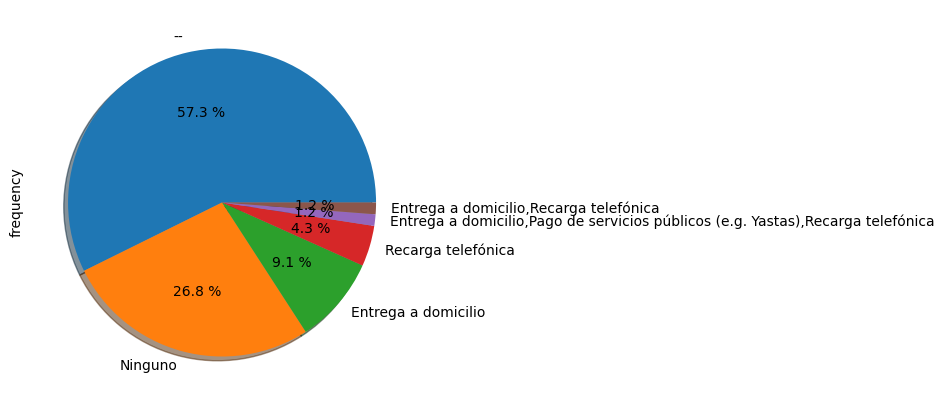

In [100]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**158_charact_organize_products_on_shelves**

In [101]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(Micro_Retailer['158_charact_organize_products_on_shelves'])
table4

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,--,79,0.461988,0.461988
1,"Categoría (e.g. limpieza, aseo personal, comes...",29,0.169591,0.631579
2,Frecuencia de venta,15,0.087719,0.719298
3,Tamaño,9,0.052632,0.771930
4,Margen de utilidad,8,0.046784,0.818713
5,Precio,6,0.035088,0.853801
6,Refrigeración,4,0.023392,0.877193
7,"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
8,"Categoría (e.g. limpieza, aseo personal, comes...",3,0.017544,0.912281
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.923977


In [102]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>1]
Filtro4

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,--,79,0.461988,0.461988
1,"Categoría (e.g. limpieza, aseo personal, comes...",29,0.169591,0.631579
2,Frecuencia de venta,15,0.087719,0.719298
3,Tamaño,9,0.052632,0.771930
4,Margen de utilidad,8,0.046784,0.818713
5,Precio,6,0.035088,0.853801
6,Refrigeración,4,0.023392,0.877193
7,"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
8,"Categoría (e.g. limpieza, aseo personal, comes...",3,0.017544,0.912281
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.923977


In [104]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('158_charact_organize_products_on_shelves')
Filtro4_index

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
--,79,0.461988,0.461988
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",29,0.169591,0.631579
Frecuencia de venta,15,0.087719,0.719298
Tamaño,9,0.052632,0.771930
Margen de utilidad,8,0.046784,0.818713
Precio,6,0.035088,0.853801
Refrigeración,4,0.023392,0.877193
"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración",3,0.017544,0.912281


<Axes: xlabel='158_charact_organize_products_on_shelves'>

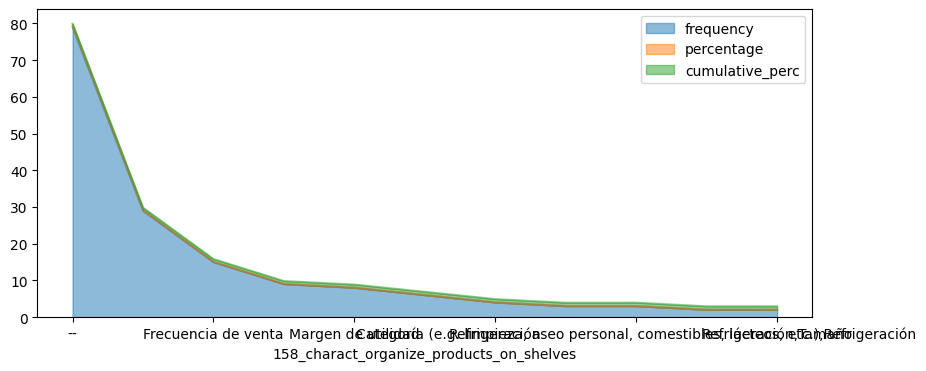

In [105]:
#Realizamos grafico de área del dataframe filtrado
Filtro4_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

##**184_store_devices**

In [110]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(Micro_Retailer['184_store_devices'])
table5

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [111]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>1]
Filtro5

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [112]:
#Ajusto el indice de mi dataframe
Filtro5_index= Filtro5.set_index('184_store_devices')
Filtro5_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4,0.023392,0.672515


Text(0, 0.5, 'Frecuencia')

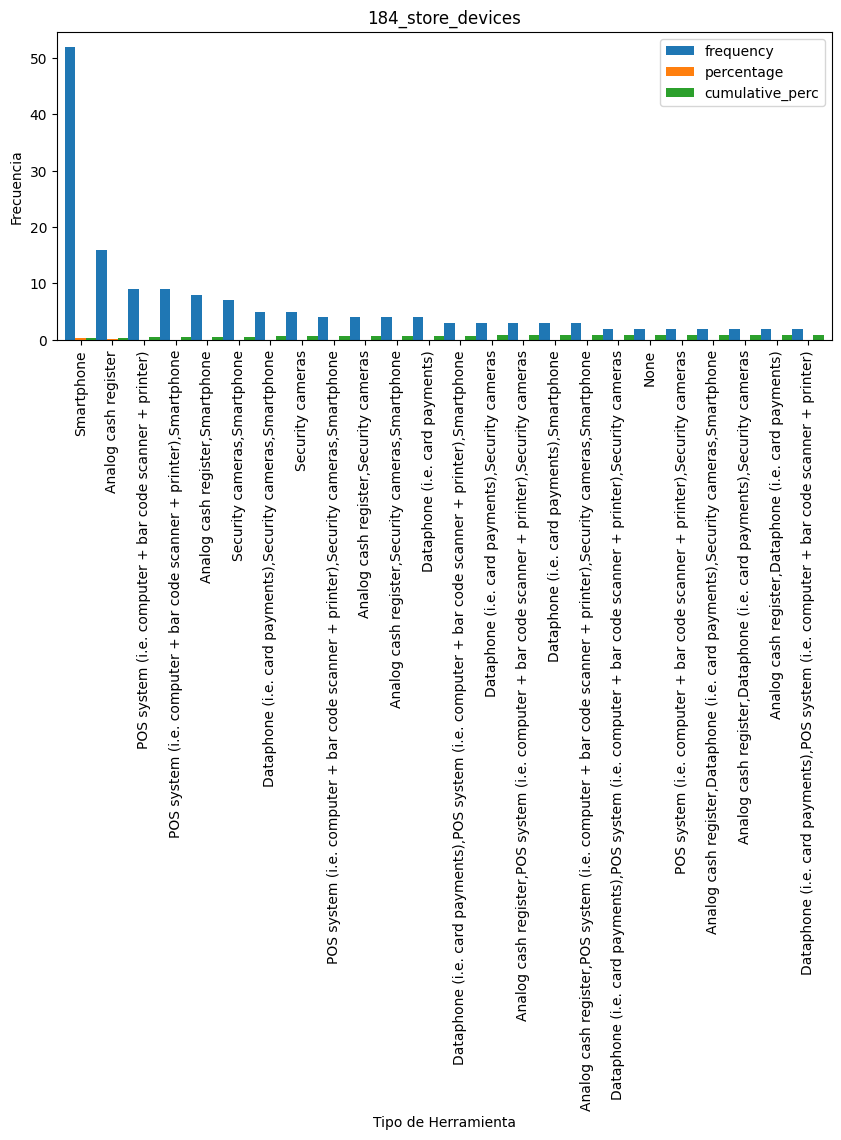

In [113]:
#Realizamos grafico de barras del dataframe filtrado
Filtro5_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('184_store_devices')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**_updated_by**

In [114]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(Micro_Retailer['_updated_by'])
table6

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [115]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro6= table6[table6['frequency']>1]
Filtro6

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [116]:
#Ajusto el indice de mi dataframe
Filtro6_index= Filtro6.set_index('_updated_by')
Filtro6_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

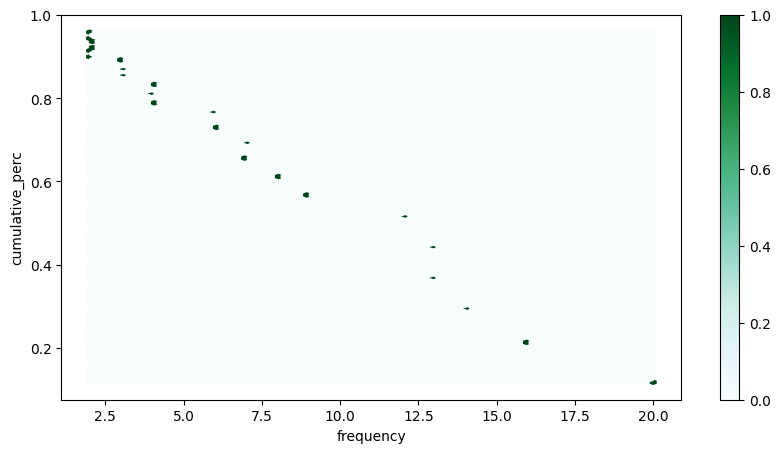

In [117]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro6_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

##**229_store_picture**

In [118]:
#Obtengo un análisis univariado de una variable categórica en específico
table7= freq_tbl(Micro_Retailer['229_store_picture'])
table7

,229_store_picture,frequency,percentage,cumulative_perc
0,1 Photo,166,0.97076,0.97076
1,2 Photos,5,0.02924,1.00000


In [119]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro7= table7[table7['frequency']>1]
Filtro7

,229_store_picture,frequency,percentage,cumulative_perc
0,1 Photo,166,0.97076,0.97076
1,2 Photos,5,0.02924,1.00000


In [121]:
#Ajusto el indice de mi dataframe
Filtro7_index= Filtro7.set_index('229_store_picture')
Filtro7_index

,frequency,percentage,cumulative_perc
229_store_picture,,,
1 Photo,166,0.97076,0.97076
2 Photos,5,0.02924,1.00000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

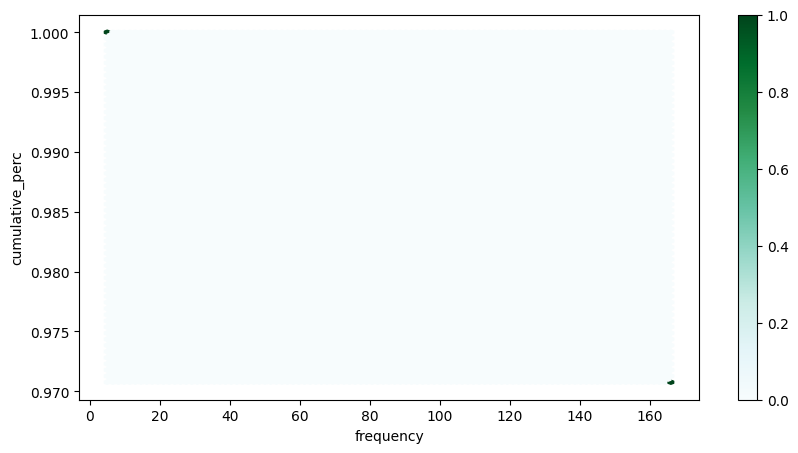

In [122]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro7_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

##**19_tax_id**

In [123]:
#Obtengo un análisis univariado de una variable categórica en específico
table8= freq_tbl(Micro_Retailer['19_tax_id'])
table8

,19_tax_id,frequency,percentage,cumulative_perc
0,--,71,0.415205,0.415205
1,yes,70,0.409357,0.824561
2,no,30,0.175439,1.000000


In [124]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro8= table8[table8['frequency']>1]
Filtro8

,19_tax_id,frequency,percentage,cumulative_perc
0,--,71,0.415205,0.415205
1,yes,70,0.409357,0.824561
2,no,30,0.175439,1.000000


In [125]:
#Ajusto el indice de mi dataframe
Filtro8_index= Filtro8.set_index('19_tax_id')
Filtro8_index

,frequency,percentage,cumulative_perc
19_tax_id,,,
--,71,0.415205,0.415205
yes,70,0.409357,0.824561
no,30,0.175439,1.000000


Text(0, 0.5, 'Frecuencia')

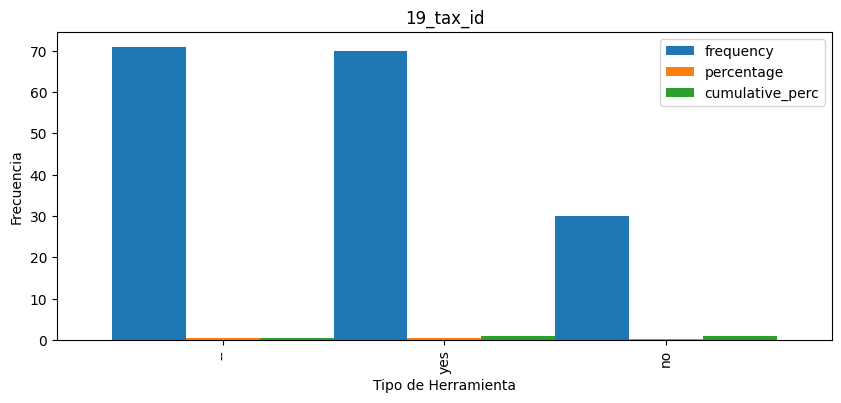

In [126]:
#Realizamos grafico de barras del dataframe filtrado
Filtro8_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('19_tax_id')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**49_inventory_records**

In [127]:
#Obtengo un análisis univariado de una variable categórica en específico
table9= freq_tbl(Micro_Retailer['49_inventory_records'])
table9

,49_inventory_records,frequency,percentage,cumulative_perc
0,--,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608
6,Mentalmente,1,0.005848,0.982456
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
8,"En papel,Mental",1,0.005848,0.994152
9,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [128]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro9= table9[table9['frequency']>1]
Filtro9

,49_inventory_records,frequency,percentage,cumulative_perc
0,--,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608


In [129]:
#Ajusto el indice de mi dataframe
Filtro9_index= Filtro9.set_index('49_inventory_records')
Filtro9_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
--,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


<Axes: ylabel='frequency'>

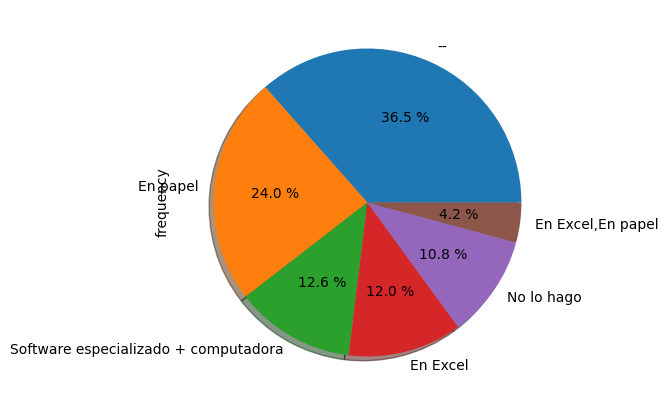

In [131]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro9_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**189_payment_methods**

In [133]:
#Obtengo un análisis univariado de una variable categórica en específico
table10= freq_tbl(Micro_Retailer['189_payment_methods'])
table10

,189_payment_methods,frequency,percentage,cumulative_perc
0,--,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [134]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro10= table10[table10['frequency']>1]
Filtro10

,189_payment_methods,frequency,percentage,cumulative_perc
0,--,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


In [135]:
#Ajusto el indice de mi dataframe
Filtro10_index= Filtro10.set_index('189_payment_methods')
Filtro10_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
--,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


Text(0, 0.5, 'Frecuencia')

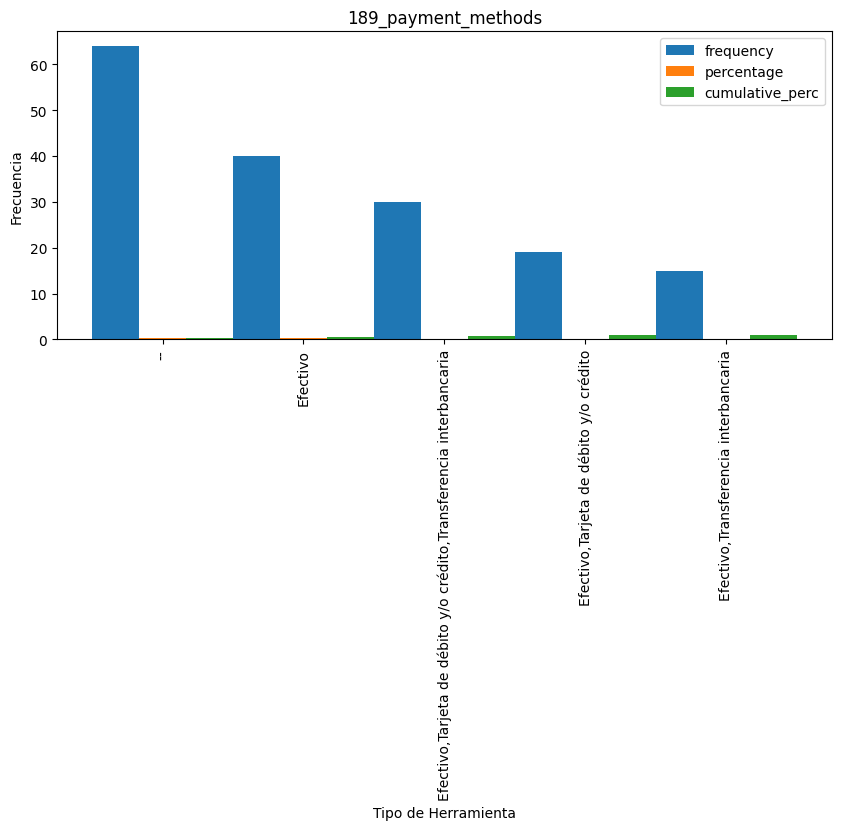

In [136]:
#Realizamos grafico de barras del dataframe filtrado
Filtro10_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('189_payment_methods')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**38_average_margin_profits**

In [137]:
#Obtengo un análisis univariado de una variable categórica en específico
table11= freq_tbl(Micro_Retailer['38_average_margin_profits'])
table11

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,--,105,0.614035,0.614035
1,30%,15,0.087719,0.701754
2,20%,9,0.052632,0.754386
3,5%,9,0.052632,0.807018
4,40%,6,0.035088,0.842105
5,50% +,6,0.035088,0.877193
6,15%,6,0.035088,0.912281
7,10%,6,0.035088,0.947368
8,35%,4,0.023392,0.970760
9,25%,4,0.023392,0.994152


In [138]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro11= table11[table11['frequency']>1]
Filtro11

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,--,105,0.614035,0.614035
1,30%,15,0.087719,0.701754
2,20%,9,0.052632,0.754386
3,5%,9,0.052632,0.807018
4,40%,6,0.035088,0.842105
5,50% +,6,0.035088,0.877193
6,15%,6,0.035088,0.912281
7,10%,6,0.035088,0.947368
8,35%,4,0.023392,0.970760
9,25%,4,0.023392,0.994152


In [139]:
#Ajusto el indice de mi dataframe
Filtro11_index= Filtro11.set_index('38_average_margin_profits')
Filtro11_index

,frequency,percentage,cumulative_perc
38_average_margin_profits,,,
--,105,0.614035,0.614035
30%,15,0.087719,0.701754
20%,9,0.052632,0.754386
5%,9,0.052632,0.807018
40%,6,0.035088,0.842105
50% +,6,0.035088,0.877193
15%,6,0.035088,0.912281
10%,6,0.035088,0.947368
35%,4,0.023392,0.970760


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

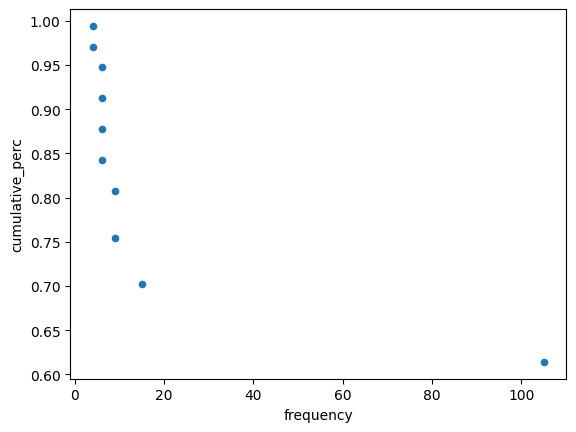

In [140]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro11_index.plot("frequency", "cumulative_perc", kind="scatter")

##**193_sales_planning_tools**

In [141]:
#Obtengo un análisis univariado de una variable categórica en específico
table12= freq_tbl(Micro_Retailer['193_sales_planning_tools'])
table12

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,--,89,0.520468,0.520468
1,Ninguna,33,0.192982,0.713450
2,Cuaderno,21,0.122807,0.836257
3,Software especializado,6,0.035088,0.871345
4,Excel,6,0.035088,0.906433
5,"Cuaderno,Excel",3,0.017544,0.923977
6,"Cuaderno,Ninguna",2,0.011696,0.935673
7,Other,1,0.005848,0.941520
8,Mental,1,0.005848,0.947368
9,Por temporada de pan,1,0.005848,0.953216


In [142]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro12= table12[table12['frequency']>1]
Filtro12

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,--,89,0.520468,0.520468
1,Ninguna,33,0.192982,0.713450
2,Cuaderno,21,0.122807,0.836257
3,Software especializado,6,0.035088,0.871345
4,Excel,6,0.035088,0.906433
5,"Cuaderno,Excel",3,0.017544,0.923977
6,"Cuaderno,Ninguna",2,0.011696,0.935673


In [143]:
#Ajusto el indice de mi dataframe
Filtro12_index= Filtro12.set_index('193_sales_planning_tools')
Filtro12_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
--,89,0.520468,0.520468
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433
"Cuaderno,Excel",3,0.017544,0.923977
"Cuaderno,Ninguna",2,0.011696,0.935673


<Axes: xlabel='193_sales_planning_tools'>

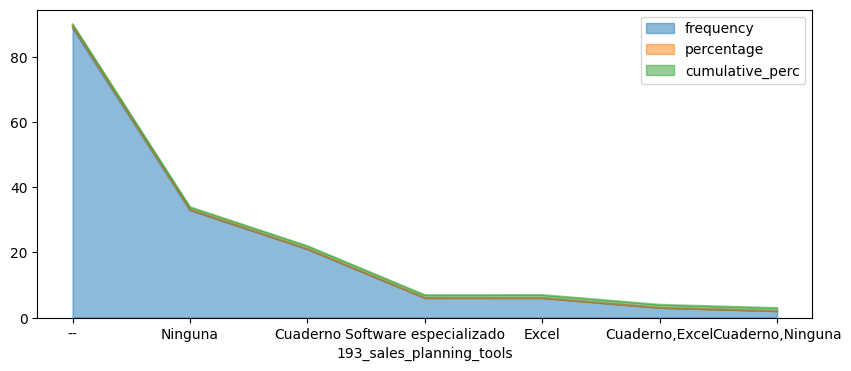

In [144]:
#Realizamos grafico de área del dataframe filtrado
Filtro12_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

##**45_willingness_reorder_suppliers**

In [145]:
#Obtengo un análisis univariado de una variable categórica en específico
table13= freq_tbl(Micro_Retailer['45_willingness_reorder_suppliers'])
table13

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,--,94,0.549708,0.549708
1,Totalmente en desacuerdo,40,0.233918,0.783626
2,Algo de acuerdo,12,0.070175,0.853801
3,Algo en desacuerdo,10,0.058480,0.912281
4,Totalmente de acuerdo,9,0.052632,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [146]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro13= table13[table13['frequency']>1]
Filtro13

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,--,94,0.549708,0.549708
1,Totalmente en desacuerdo,40,0.233918,0.783626
2,Algo de acuerdo,12,0.070175,0.853801
3,Algo en desacuerdo,10,0.058480,0.912281
4,Totalmente de acuerdo,9,0.052632,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [147]:
#Ajusto el indice de mi dataframe
Filtro13_index= Filtro13.set_index('45_willingness_reorder_suppliers')
Filtro13_index

,frequency,percentage,cumulative_perc
45_willingness_reorder_suppliers,,,
--,94,0.549708,0.549708
Totalmente en desacuerdo,40,0.233918,0.783626
Algo de acuerdo,12,0.070175,0.853801
Algo en desacuerdo,10,0.058480,0.912281
Totalmente de acuerdo,9,0.052632,0.964912
Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


<Axes: ylabel='frequency'>

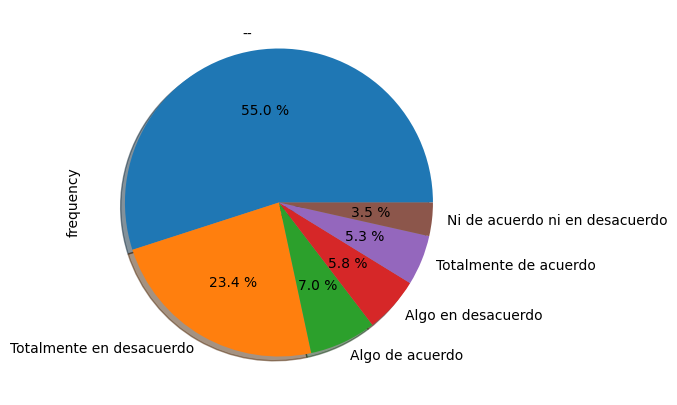

In [148]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro13_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##**43_willingness_share_sales_data_suppliers**

In [149]:
#Obtengo un análisis univariado de una variable categórica en específico
table14= freq_tbl(Micro_Retailer['43_willingness_share_sales_data_suppliers'])
table14

,43_willingness_share_sales_data_suppliers,frequency,percentage,cumulative_perc
0,--,101,0.590643,0.590643
1,Totalmente en desacuerdo,53,0.309942,0.900585
2,Algo de acuerdo,7,0.040936,0.941520
3,Algo en desacuerdo,5,0.029240,0.970760
4,Totalmente de acuerdo,3,0.017544,0.988304
5,Ni de acuerdo ni en desacuerdo,2,0.011696,1.000000


In [150]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro14= table14[table14['frequency']>1]
Filtro14

,43_willingness_share_sales_data_suppliers,frequency,percentage,cumulative_perc
0,--,101,0.590643,0.590643
1,Totalmente en desacuerdo,53,0.309942,0.900585
2,Algo de acuerdo,7,0.040936,0.941520
3,Algo en desacuerdo,5,0.029240,0.970760
4,Totalmente de acuerdo,3,0.017544,0.988304
5,Ni de acuerdo ni en desacuerdo,2,0.011696,1.000000


In [151]:
#Ajusto el indice de mi dataframe
Filtro14_index= Filtro14.set_index('43_willingness_share_sales_data_suppliers')
Filtro14_index

,frequency,percentage,cumulative_perc
43_willingness_share_sales_data_suppliers,,,
--,101,0.590643,0.590643
Totalmente en desacuerdo,53,0.309942,0.900585
Algo de acuerdo,7,0.040936,0.941520
Algo en desacuerdo,5,0.029240,0.970760
Totalmente de acuerdo,3,0.017544,0.988304
Ni de acuerdo ni en desacuerdo,2,0.011696,1.000000


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

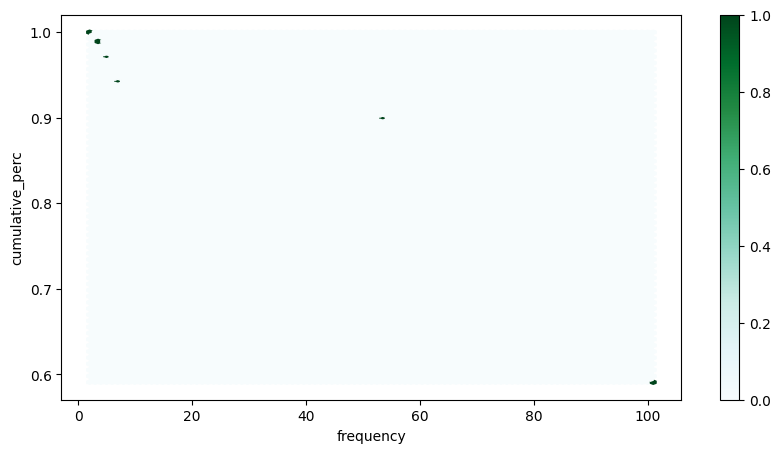

In [152]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
Filtro14_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

##**185_place_orders_suppliers**

In [153]:
#Obtengo un análisis univariado de una variable categórica en específico
table15= freq_tbl(Micro_Retailer['185_place_orders_suppliers'])
table15

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,--,100,0.584795,0.584795
1,En persona,20,0.116959,0.701754
2,Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.748538
3,"En persona,Llamada telefónica,Mensajería insta...",7,0.040936,0.789474
4,Llamada telefónica,6,0.035088,0.824561
5,"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.853801
6,Página web del proveedor,5,0.029240,0.883041
7,"En persona,Llamada telefónica",5,0.029240,0.912281
8,"Mensaje de texto (SMS),Mensajería instantánea ...",2,0.011696,0.923977
9,"En persona,Página web del proveedor",2,0.011696,0.935673


In [154]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro15= table15[table15['frequency']>1]
Filtro15

,185_place_orders_suppliers,frequency,percentage,cumulative_perc
0,--,100,0.584795,0.584795
1,En persona,20,0.116959,0.701754
2,Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.748538
3,"En persona,Llamada telefónica,Mensajería insta...",7,0.040936,0.789474
4,Llamada telefónica,6,0.035088,0.824561
5,"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.853801
6,Página web del proveedor,5,0.029240,0.883041
7,"En persona,Llamada telefónica",5,0.029240,0.912281
8,"Mensaje de texto (SMS),Mensajería instantánea ...",2,0.011696,0.923977
9,"En persona,Página web del proveedor",2,0.011696,0.935673


In [155]:
#Ajusto el indice de mi dataframe
Filtro15_index= Filtro15.set_index('185_place_orders_suppliers')
Filtro15_index

,frequency,percentage,cumulative_perc
185_place_orders_suppliers,,,
--,100,0.584795,0.584795
En persona,20,0.116959,0.701754
Mensajería instantánea (e.g. WhatsApp),8,0.046784,0.748538
"En persona,Llamada telefónica,Mensajería instantánea (e.g. WhatsApp)",7,0.040936,0.789474
Llamada telefónica,6,0.035088,0.824561
"En persona,Mensajería instantánea (e.g. WhatsApp)",5,0.029240,0.853801
Página web del proveedor,5,0.029240,0.883041
"En persona,Llamada telefónica",5,0.029240,0.912281
"Mensaje de texto (SMS),Mensajería instantánea (e.g. WhatsApp)",2,0.011696,0.923977


Text(0, 0.5, 'Frecuencia')

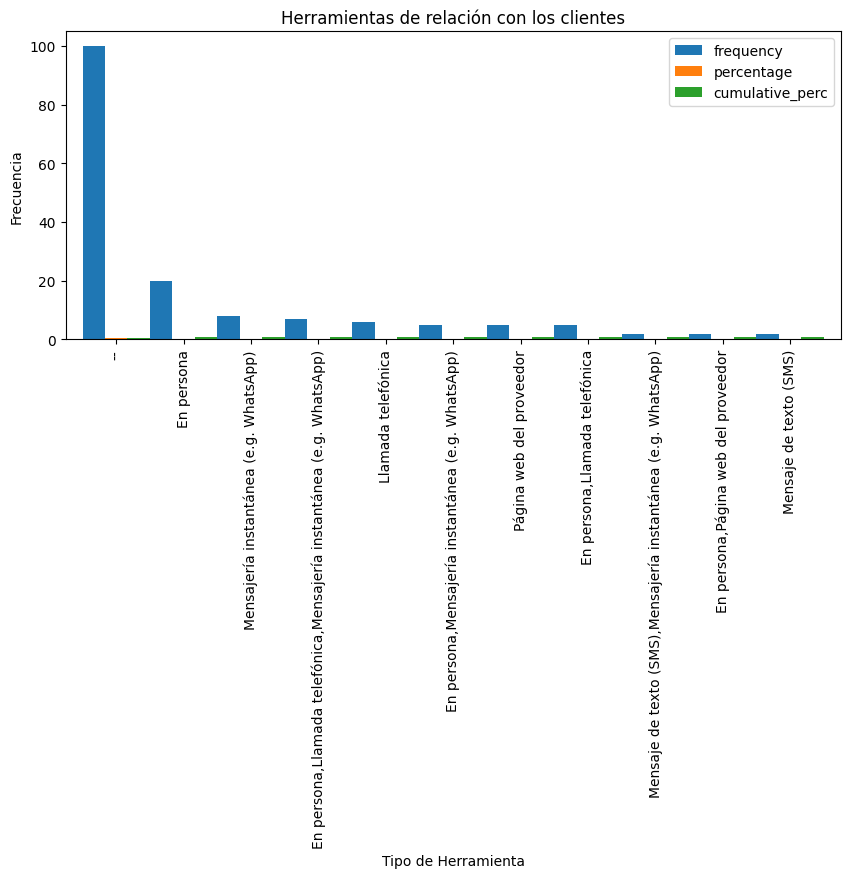

In [156]:
#Realizamos grafico de barras del dataframe filtrado
Filtro15_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**53_special_conditions_suppliers**

In [157]:
#Obtengo un análisis univariado de una variable categórica en específico
table16= freq_tbl(Micro_Retailer['53_special_conditions_suppliers'])
table16

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,--,124,0.725146,0.725146
1,Crédito,9,0.052632,0.777778
2,Descuento por compras anticipadas,9,0.052632,0.830409
3,"Consignación,Crédito,Descuento por compras ant...",4,0.023392,0.853801
4,"Crédito,Descuento por compras anticipadas",4,0.023392,0.877193
5,Ninguno,4,0.023392,0.900585
6,ninguno,2,0.011696,0.912281
7,Consignación,2,0.011696,0.923977
8,Ninguna,1,0.005848,0.929825
9,Preventa,1,0.005848,0.935673


In [158]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro16= table16[table16['frequency']>1]
Filtro16

,53_special_conditions_suppliers,frequency,percentage,cumulative_perc
0,--,124,0.725146,0.725146
1,Crédito,9,0.052632,0.777778
2,Descuento por compras anticipadas,9,0.052632,0.830409
3,"Consignación,Crédito,Descuento por compras ant...",4,0.023392,0.853801
4,"Crédito,Descuento por compras anticipadas",4,0.023392,0.877193
5,Ninguno,4,0.023392,0.900585
6,ninguno,2,0.011696,0.912281
7,Consignación,2,0.011696,0.923977


In [159]:
#Ajusto el indice de mi dataframe
Filtro16_index= Filtro16.set_index('53_special_conditions_suppliers')
Filtro16_index

,frequency,percentage,cumulative_perc
53_special_conditions_suppliers,,,
--,124,0.725146,0.725146
Crédito,9,0.052632,0.777778
Descuento por compras anticipadas,9,0.052632,0.830409
"Consignación,Crédito,Descuento por compras anticipadas,Recompra",4,0.023392,0.853801
"Crédito,Descuento por compras anticipadas",4,0.023392,0.877193
Ninguno,4,0.023392,0.900585
ninguno,2,0.011696,0.912281
Consignación,2,0.011696,0.923977


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

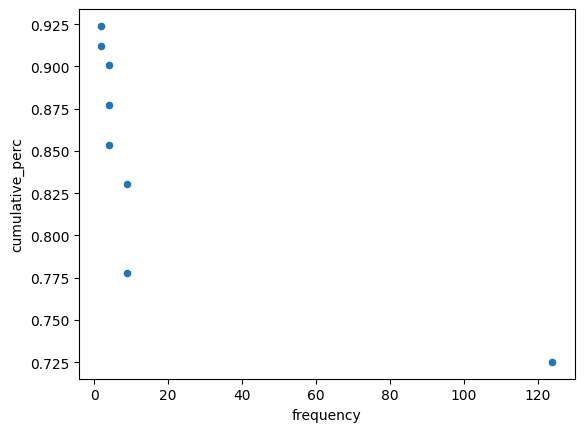

In [160]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro16_index.plot("frequency", "cumulative_perc", kind="scatter")

##**210_sales_channels**

In [161]:
#Obtengo un análisis univariado de una variable categórica en específico
table17= freq_tbl(Micro_Retailer['210_sales_channels'])
table17

,210_sales_channels,frequency,percentage,cumulative_perc
0,--,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
6,Llamada a Teléfono celular,5,0.029240,0.795322
7,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
8,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
9,Ninguno,3,0.017544,0.859649


In [162]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro17= table17[table17['frequency']>1]
Filtro17

,210_sales_channels,frequency,percentage,cumulative_perc
0,--,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
6,Llamada a Teléfono celular,5,0.029240,0.795322
7,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
8,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
9,Ninguno,3,0.017544,0.859649


In [163]:
#Ajusto el indice de mi dataframe
Filtro17_index= Filtro17.set_index('210_sales_channels')
Filtro17_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
--,89,0.520468,0.520468
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",3,0.017544,0.842105


Text(0, 0.5, 'Frecuencia')

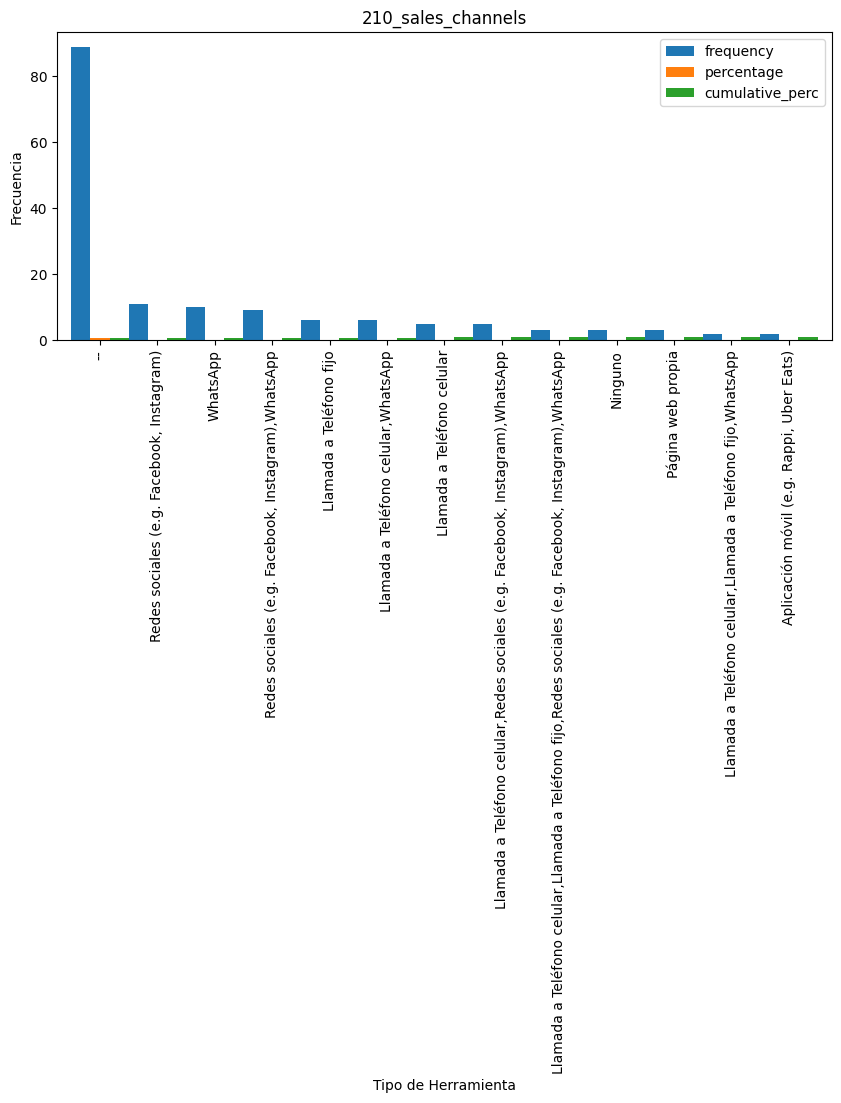

In [164]:
#Realizamos grafico de barras del dataframe filtrado
Filtro17_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('210_sales_channels')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

##**232_type_of_store**

In [165]:
#Obtengo un análisis univariado de una variable categórica en específico
table18= freq_tbl(Micro_Retailer['232_type_of_store'])
table18

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [166]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro18= table18[table18['frequency']>1]
Filtro18

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [167]:
#Ajusto el indice de mi dataframe
Filtro18_index= Filtro18.set_index('232_type_of_store')
Filtro18_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

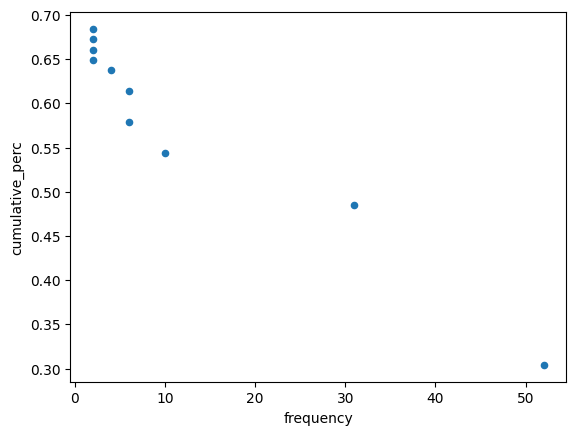

In [168]:
#Realizamos grafico de dispersión del dataframe filtrado
Filtro18_index.plot("frequency", "cumulative_perc", kind="scatter")

##**310_burnout**

In [169]:
#Obtengo un análisis univariado de una variable categórica en específico
table19= freq_tbl(Micro_Retailer['310_burnout'])
table19

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,--,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [170]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro19= table19[table19['frequency']>1]
Filtro19

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,--,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [171]:
#Ajusto el indice de mi dataframe
Filtro19_index= Filtro19.set_index('310_burnout')
Filtro19_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
--,64,0.374269,0.771930
yes,39,0.228070,1.000000


<Axes: xlabel='310_burnout'>

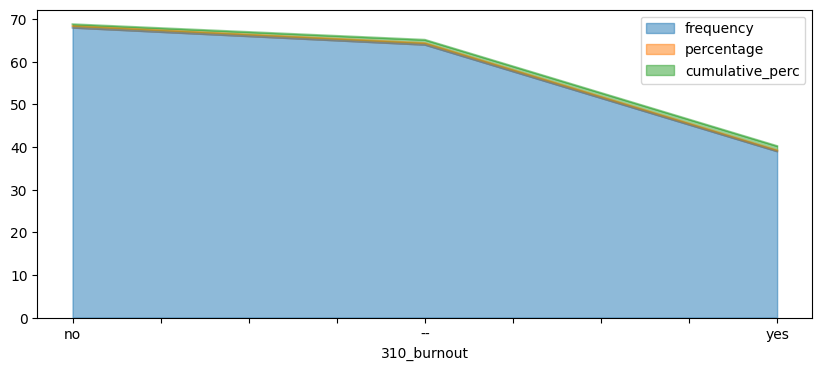

In [172]:
#Realizamos grafico de área del dataframe filtrado
Filtro19_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

##**277_payment_method_suppliers**

In [173]:
#Obtengo un análisis univariado de una variable categórica en específico
table20= freq_tbl(Micro_Retailer['277_payment_method_suppliers'])
table20

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,--,103,0.602339,0.602339
1,Efectivo,43,0.251462,0.853801
2,"Efectivo,Transferencia interbancaria",8,0.046784,0.900585
3,Transferencia interbancaria,7,0.040936,0.941520
4,"Efectivo,Tarjeta de débito y/o crédito",4,0.023392,0.964912
5,Tarjeta de débito y/o crédito,4,0.023392,0.988304
6,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",2,0.011696,1.000000


In [174]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro20= table20[table20['frequency']>1]
Filtro20

,277_payment_method_suppliers,frequency,percentage,cumulative_perc
0,--,103,0.602339,0.602339
1,Efectivo,43,0.251462,0.853801
2,"Efectivo,Transferencia interbancaria",8,0.046784,0.900585
3,Transferencia interbancaria,7,0.040936,0.941520
4,"Efectivo,Tarjeta de débito y/o crédito",4,0.023392,0.964912
5,Tarjeta de débito y/o crédito,4,0.023392,0.988304
6,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",2,0.011696,1.000000


In [175]:
#Ajusto el indice de mi dataframe
Filtro20_index= Filtro20.set_index('277_payment_method_suppliers')
Filtro20_index

,frequency,percentage,cumulative_perc
277_payment_method_suppliers,,,
--,103,0.602339,0.602339
Efectivo,43,0.251462,0.853801
"Efectivo,Transferencia interbancaria",8,0.046784,0.900585
Transferencia interbancaria,7,0.040936,0.941520
"Efectivo,Tarjeta de débito y/o crédito",4,0.023392,0.964912
Tarjeta de débito y/o crédito,4,0.023392,0.988304
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",2,0.011696,1.000000


<Axes: ylabel='frequency'>

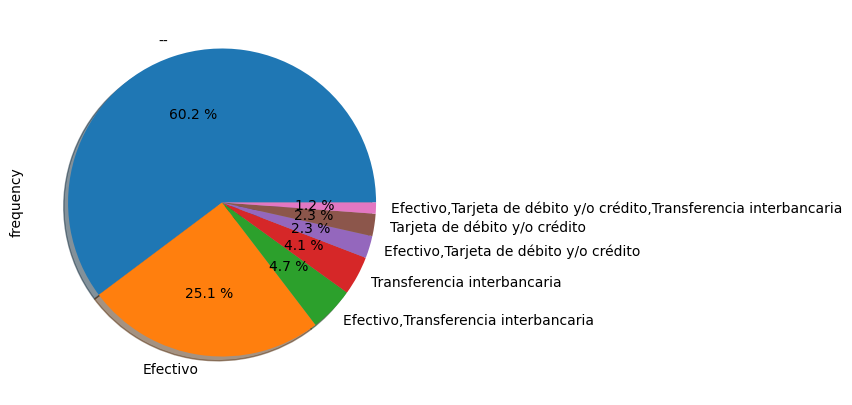

In [176]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro20_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")